# Data Cleaning, Exploratory Data Analysis, Flight Booking Price Prediction

In [2]:
# "Importing all the necessary libraries."
import numpy as np # Numpy as np
import pandas as pd # pandas as pd
import matplotlib.pyplot as plt # Matplotlib as plt
import seaborn as sns # Seaborn as sns

In [3]:
df=pd.read_csv('Flight_Booking.csv') # Loading the dataset

In [4]:
df.head()# first look at data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape# Checking the number of rows and columns

(300153, 12)

In [6]:
df.info() # Checking d-types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True) # Dropping unwanted columns

In [8]:
df.isnull().sum() # Checking null values

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
df.duplicated().sum() # Checking for duplicates

0

## Finding Outliers

In [10]:
# for finding outliers first we need to separate the columns which is not objective.
numeric_columns = df.select_dtypes(include=np.number).columns # storing all the int columns into the variable called numerice_column

In [11]:
numeric_columns # Checking the columns what we get

Index(['duration', 'days_left', 'price'], dtype='object')

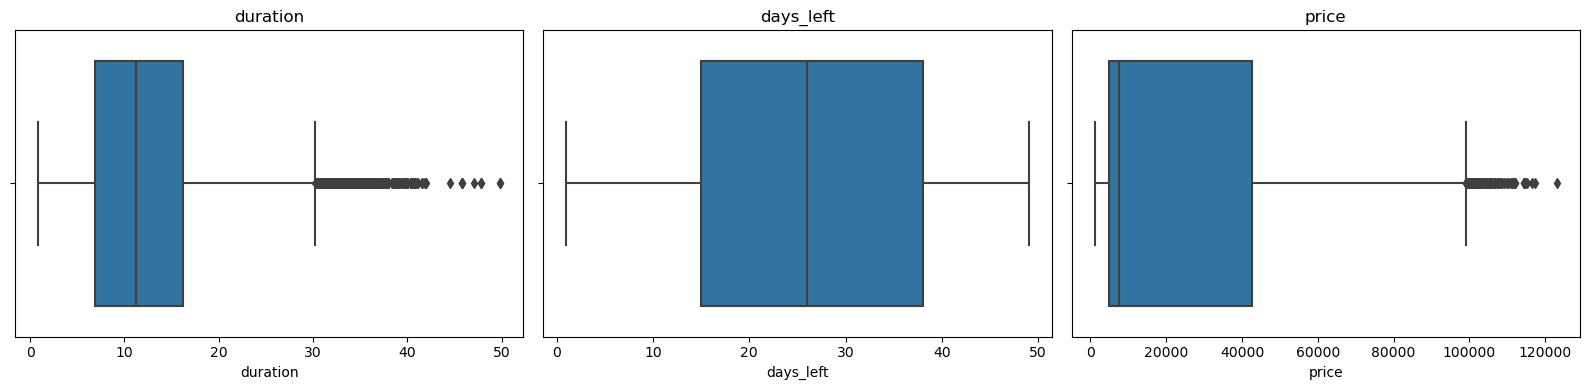

In [12]:
# Plotting the Boxplot to visualize the outliers 
plt.figure(figsize=(16,4)) # Setting the frame to fitt all the plots in one

# using for loop we are plotting the box plot
for i,col in enumerate(numeric_columns):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=df[col],whis=1.5)
    plt.tight_layout()
    plt.title(col)
plt.show()

## Treating Outliers

In [13]:
# defining a function to find and remove outliers
def remove_outliers(df1,col):
    Q1=df1[col].quantile(0.25) # This is percentail that act as lower border
    Q3=df1[col].quantile(0.75) # This is percentail that act as Upper border
    IQR = Q3-Q1 # defining Inter Quartile Range(IQR)
    Upper_Band = Q3+1.5*IQR # Defining Upper Band Lower
    Lower_Band = Q1-1.5*IQR # Defining Lower Band 
    df1[col]=np.clip(df1[col],Upper_Band,Lower_Band)
    return df1
    


def treat_outliers(df1,col_list): # defing one more function to treat outliers Using for loop.
    for col in col_list:
        df1=remove_outliers(df1,col)
    return df1

In [14]:
df=treat_outliers(df,numeric_columns) # Using the function we have removed the outliers in our actual dataset

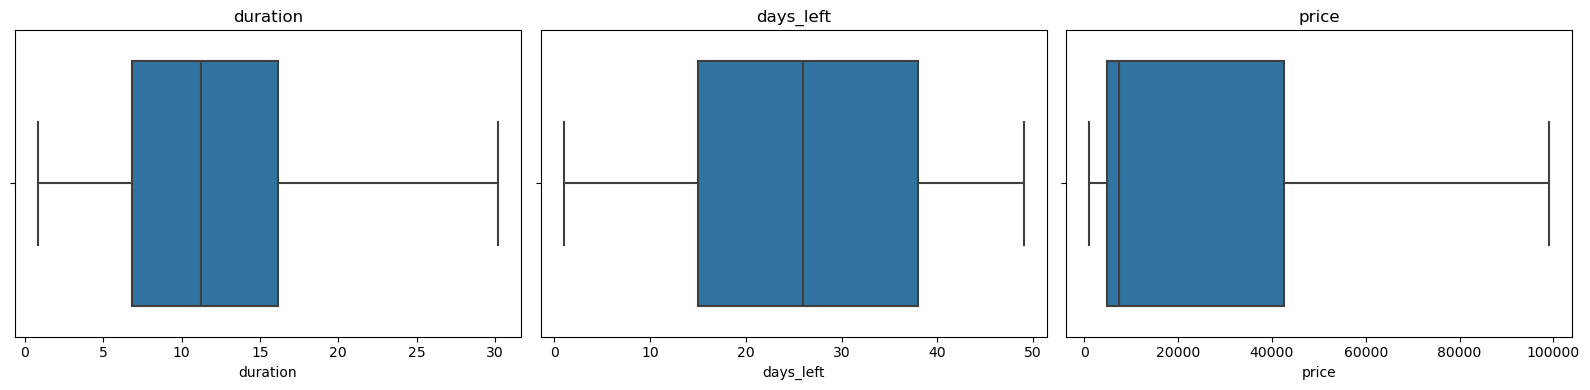

In [15]:
# Checking the outliers again
plt.figure(figsize=(16,4))

for i,col in enumerate(numeric_columns):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=df[col],whis=1.5)
    plt.tight_layout()
    plt.title(col)
plt.show()

# EDA

**So here our target is to predict price. so our eda will also be done by targetting the price column which is dependent on other indipendent variables**

In [16]:
df.head() # Look at the data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Airline V/s Price

In [17]:
df_airline = df.groupby('airline')['price'].mean().reset_index() # Grouping the airlines and taking the average price of airline

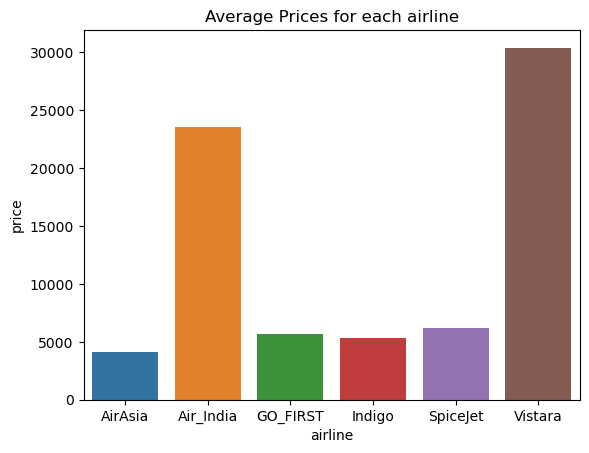

In [18]:
# Plotting the prices with respect to airlines
sns.barplot(x=df_airline['airline'],y=df_airline['price'])
plt.title('Average Prices for each airline')
plt.show()

## Inferences:
- **Air India and Vistara Has Highest Ticket Price Compared to other airlines**
- **Remaining airlines prices are more or the same**

## Flight v/s price

In [19]:
df_flight = df.groupby('flight')['price'].mean().reset_index() # Grouping all the flights and takeing average price

Text(0, 0.5, 'Count')

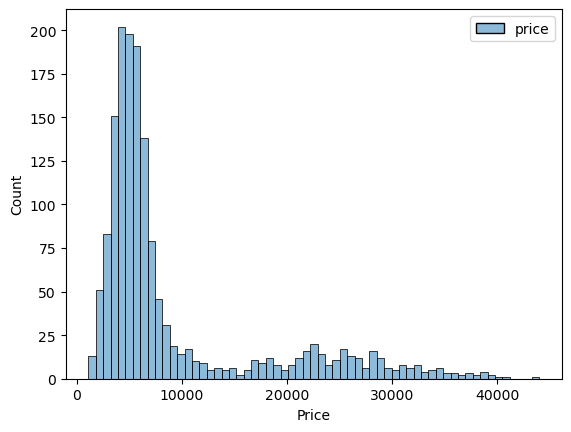

In [20]:
# Plotting the histogram as there lot of flights and not well suited for bar plots.. 
sns.histplot(df_flight)
plt.xlabel('Price')
plt.ylabel('Count')

## Inferences:
- **Most of the flighs are in range up to 10000 price range**

## Source City V/s price

In [21]:
df_SourceCity = df.groupby('source_city')['price'].mean().reset_index() # Grouping all the source_city and takeing average price

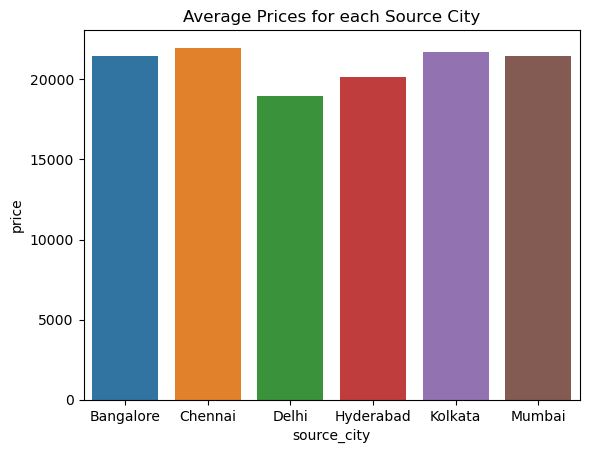

In [23]:
# Plotting the prices with respect to Source City
sns.barplot(x=df_SourceCity['source_city'],y=df_SourceCity['price'])
plt.title('Average Prices for each Source City')
plt.show()

## Inferences:
- **Most of the Citys are in same range of price**

## departure time v/s 

In [27]:
df_departure_price = df.groupby('departure_time')['price'].mean().reset_index() # Grouping all the source_city and takeing average price

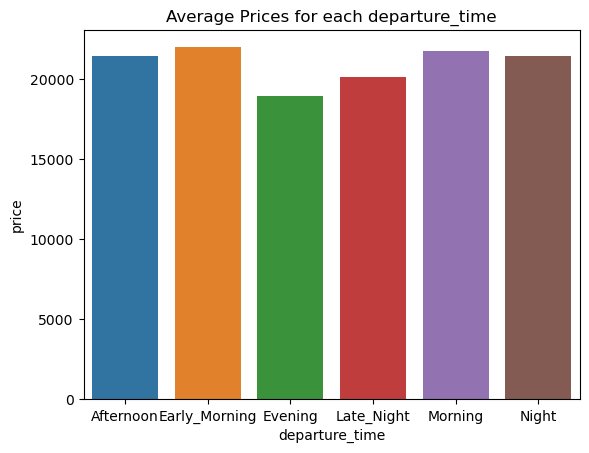

In [30]:
sns.barplot(x=df_departure_price['departure_time'],y=df_SourceCity['price'])
plt.title('Average Prices for each departure_time')
plt.show()

## Inferences:
- **Most of the Departure Time are in same range of price**

## stops/price

In [29]:
df_stops_price = df.groupby('stops')['price'].mean().reset_index() # Grouping all the source_city and takeing average price

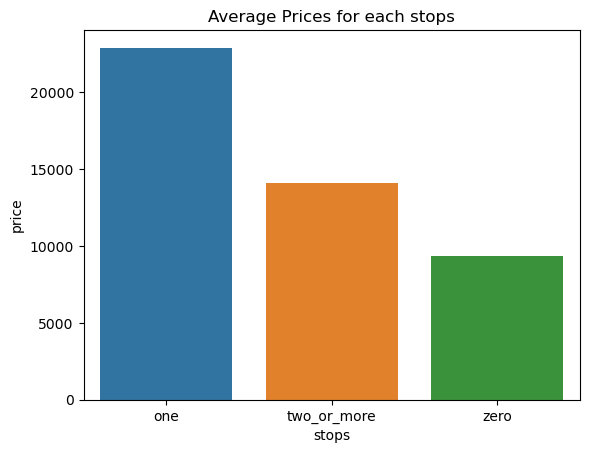

In [33]:
sns.barplot(x=df_stops_price['stops'],y=df_stops_price['price'])
plt.title('Average Prices for each stops')
plt.show()

## Inferences:
- **the price for one stop is higher than others**

## arrival_time/price

In [30]:
df_arrival_time_price = df.groupby('arrival_time')['price'].mean().reset_index() # Grouping all the arrival time and takeing average price

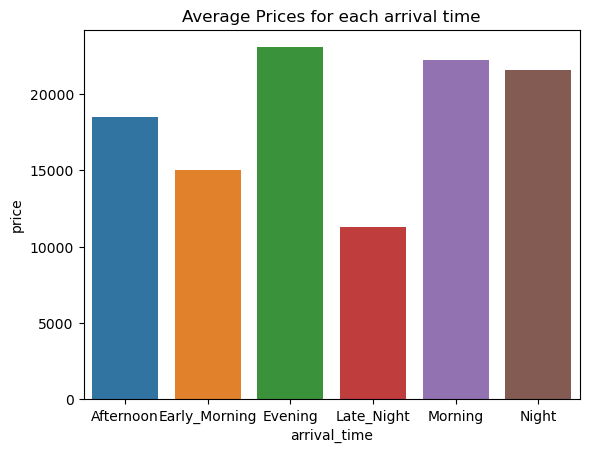

In [31]:
# plotting the prices according to the arrival time
sns.barplot(x=df_arrival_time_price['arrival_time'],y=df_arrival_time_price['price'])
plt.title('Average Prices for each arrival time')
plt.show()

## destination_city/price

In [38]:
df_destination_city_price = df.groupby('destination_city')['price'].mean().reset_index()
df_destination_city_price

,destination_city,price
0,Bangalore,21591.426353
1,Chennai,21951.740686
2,Delhi,18434.506363
3,Hyderabad,20425.850232
4,Kolkata,21956.889732
5,Mumbai,21370.066822


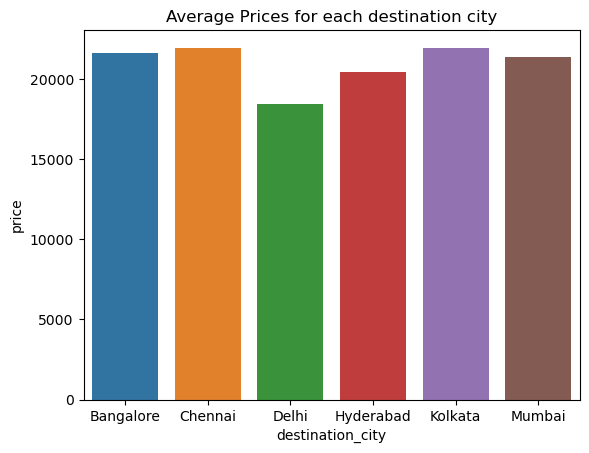

In [39]:
sns.barplot(x=df_destination_city_price['destination_city'],y=df_destination_city_price['price'])
plt.title('Average Prices for each destination city')
plt.show()

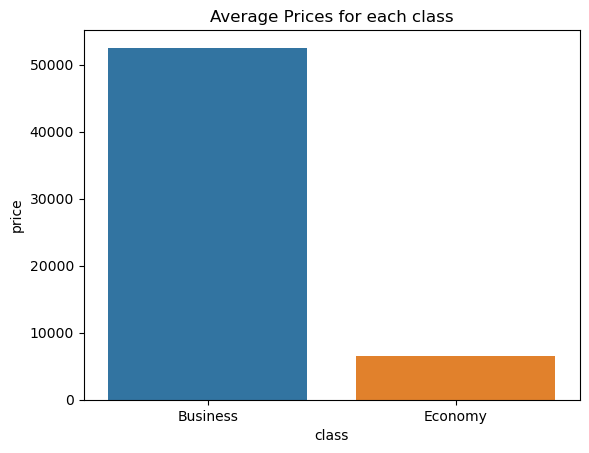

In [40]:
# class/price
df_class_price = df.groupby('class')['price'].mean().reset_index()
df_class_price

sns.barplot(x=df_class_price['class'],y=df_class_price['price'])
plt.title('Average Prices for each class')
plt.show()

In [41]:
df_duration_price=df.groupby('duration')['price'].mean().reset_index()

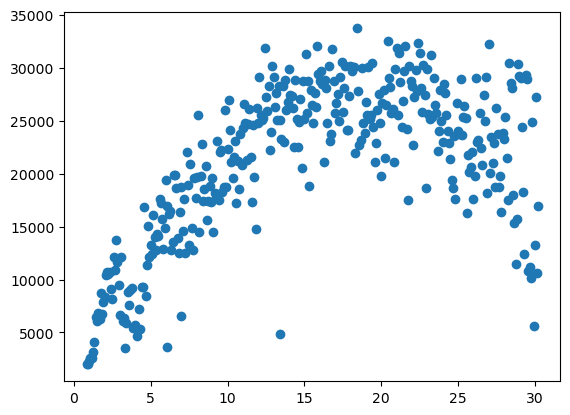

In [42]:
plt.scatter(x=df_duration_price['duration'],y=df_duration_price['price'])

In [43]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [44]:
df_days_lef=df.groupby('days_left')['price'].mean().reset_index()

<Axes: xlabel='days_left', ylabel='price'>

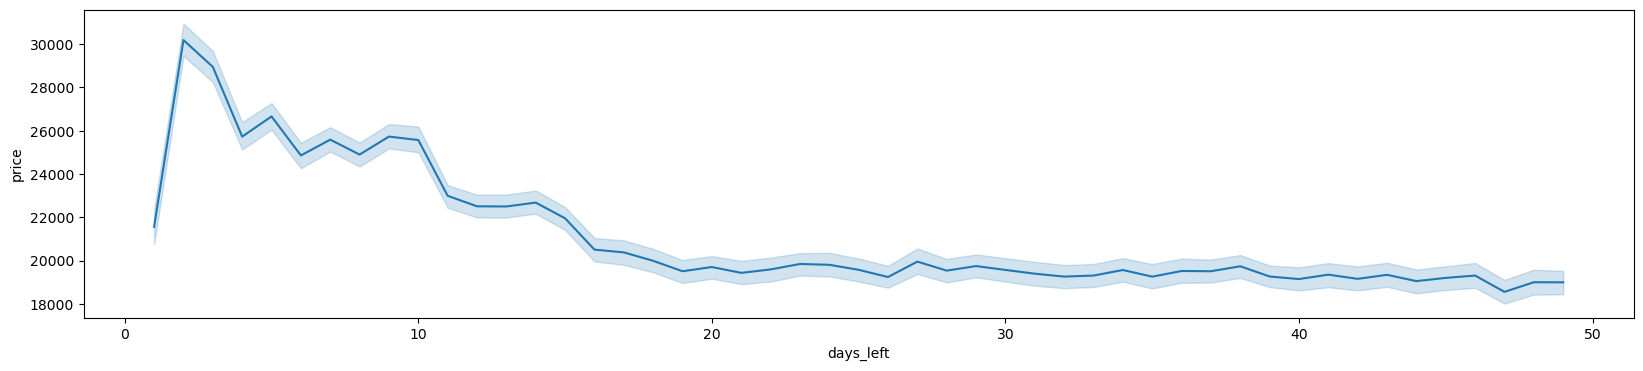

In [45]:
plt.figure(figsize=(20,4))
sns.lineplot(x=df['days_left'],y=df['price'])

In [46]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [47]:
df.shape

(300153, 11)

In [48]:
df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [49]:
df['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [50]:
obj_columns= df.select_dtypes(include=np.object_).columns

In [51]:
obj_columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [52]:
print(type(obj_columns))

<class 'pandas.core.indexes.base.Index'>


In [53]:
obj_columns=obj_columns.drop('flight')

In [54]:
obj_columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')

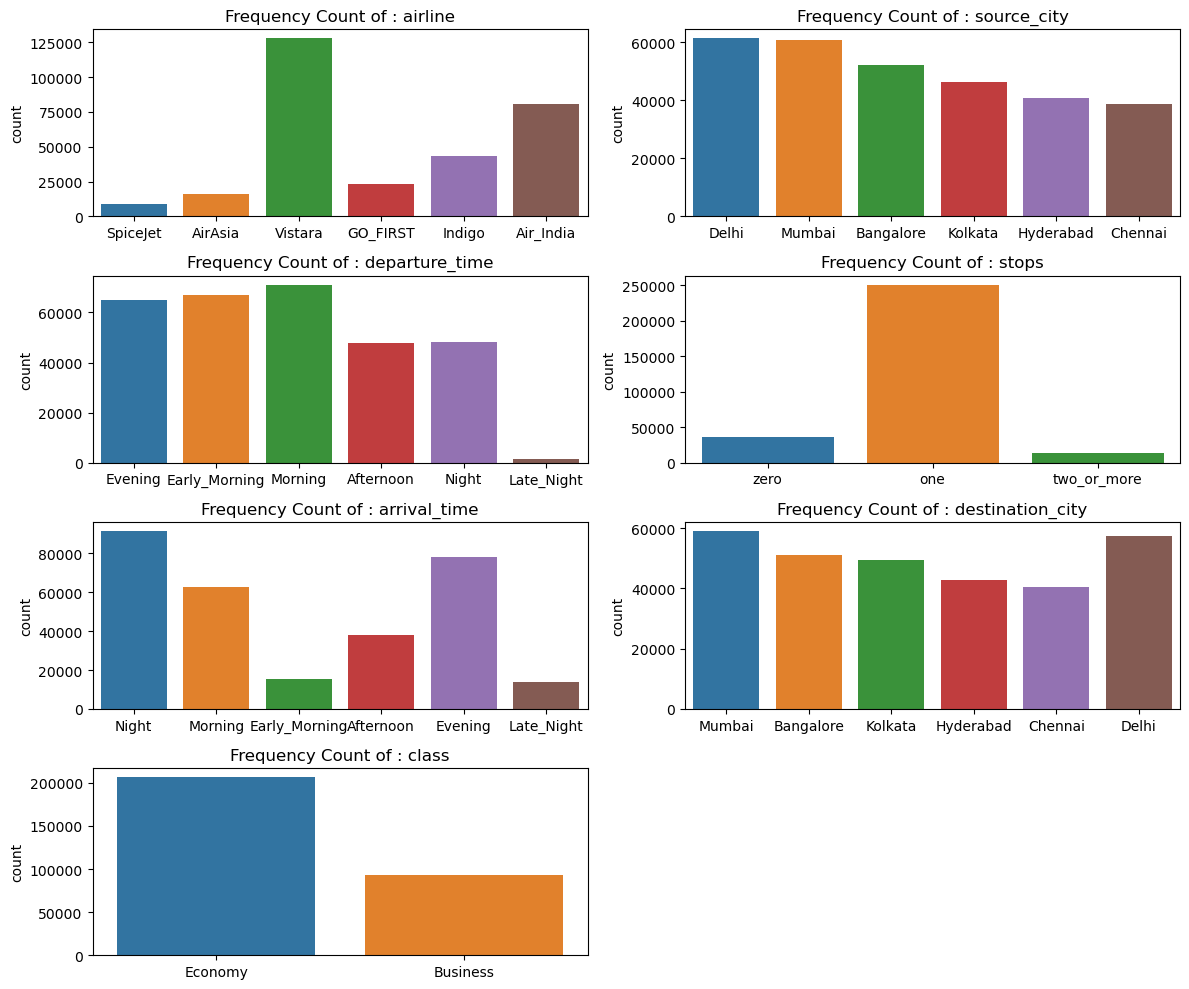

In [55]:
plt.figure(figsize=(12,10))

for i,col in enumerate(obj_columns):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[col])
    plt.title(f'Frequency Count of : {col}')
    plt.xlabel('')
    plt.tight_layout()
plt.show()

## Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [57]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [58]:
df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


C:\Users\UDAY\AppData\Local\Temp\ipykernel_10612\3412028582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


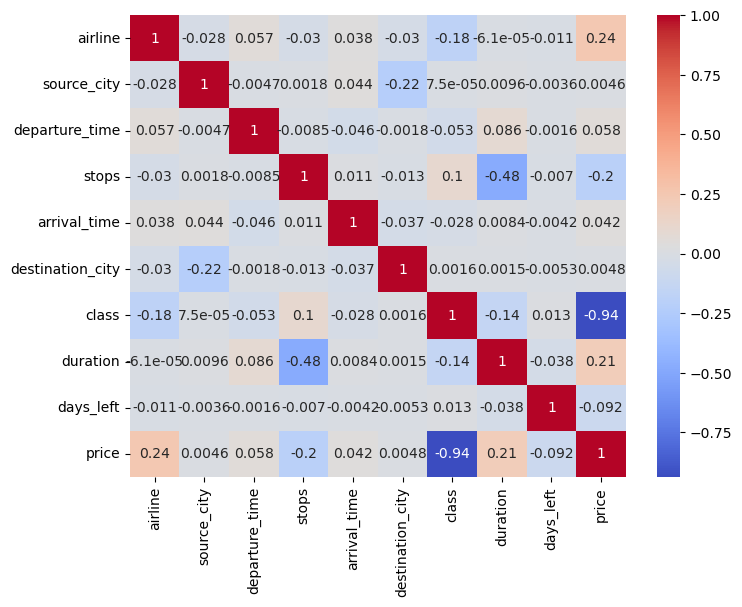

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

## Feature Selection

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
col_list=[]
for col in df.columns:
    if ((df[col].dtype != 'object')&(col != 'price')):
        col_list.append(col)

X=df[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i)
                for i in range(len(X.columns))]

print(vif_data)


            feature       VIF
0           airline  3.395845
1       source_city  2.930530
2    departure_time  2.782556
3             stops  1.432001
4      arrival_time  3.685767
5  destination_city  2.886892
6             class  2.848786
7          duration  4.168925
8         days_left  3.979515


### Applaying Standardization

In [135]:
X = df.drop(columns=['price', 'flight'])
y=df['price']

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
lr_X_train,lr_X_test,lr_y_train,lr_y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [138]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [139]:
lr_X_train=sc.fit_transform(lr_X_train)
lr_X_test=sc.fit_transform(lr_X_test)

In [140]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [141]:
lr.fit(lr_X_train,lr_y_train)
lr_y_pred=lr.predict(lr_X_test)
difference=pd.DataFrame(np.c_[lr_y_test,lr_y_pred],columns=['Acutal_Value','Predicted_Value'])
difference

,Acutal_Value,Predicted_Value
0,7366.0,4573.151934
1,64831.0,52806.678862
2,6195.0,7860.976618
3,60160.0,56087.650806
4,6578.0,6667.816584
...,...,...
60026,5026.0,5826.668849
60027,3001.0,490.307482
60028,6734.0,5843.348041
60029,5082.0,-1550.832673


- **Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) of the Linear regression model**

In [142]:
from sklearn.metrics import r2_score
r_score= r2_score(lr_y_test,lr_y_pred)
print(f'r2_Score :                       {r_score}')

from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(lr_y_test,lr_y_pred)
print(f'mean abs error :                 {mean_abs_error}')


from sklearn.metrics import mean_absolute_percentage_error
lr_mean_absolute_percentage_error= mean_absolute_percentage_error(lr_y_test,lr_y_pred)
print(f'mean_absolute_percentage_error : {lr_mean_absolute_percentage_error}')


mean_sq_error=metrics.mean_squared_error(lr_y_test,lr_y_pred)
print(f'mean_sq_error :                   {mean_sq_error}')

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(lr_y_test,lr_y_pred))
print(f'RMSE :                             {root_mean_sq_error}')

r2_Score :                       0.9049847760699258
mean abs error :                 4625.601159976593
mean_absolute_percentage_error : 0.43627317283189276
mean_sq_error :                   48931028.45225085
RMSE :                             6995.071726026178


C:\Users\UDAY\AppData\Local\Temp\ipykernel_10612\1773656036.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lr_y_test,label="Actual")
C:\Users\UDAY\AppData\Local\Temp\ipykernel_10612\1773656036.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lr_y_pred,label="Predicted")


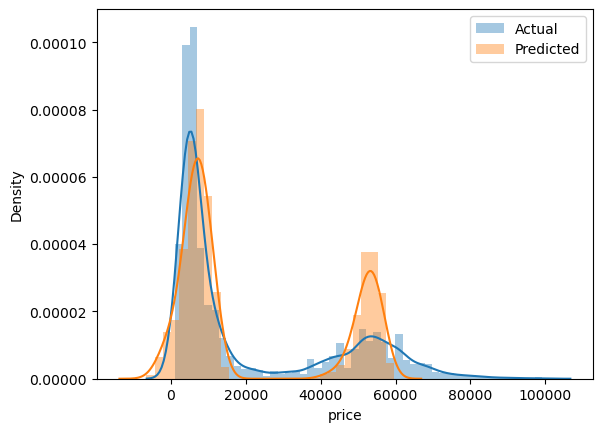

In [144]:
sns.distplot(lr_y_test,label="Actual")
sns.distplot(lr_y_pred,label="Predicted")
plt.legend()

In [151]:
from sklearn.tree import DecisionTreeRegressor
dt_X_train,dt_X_test,dt_y_train,dt_y_test=train_test_split(X,y,test_size=0.2,random_state=42)
dt=DecisionTreeRegressor()
dt.fit(dt_X_train,dt_y_train)
dt_y_pred=dt.predict(dt_X_test)


dt_r_score= r2_score(dt_y_test,dt_y_pred)
print(f'r2_Score :                       {dt_r_score}')


dt_mean_abs_error=metrics.mean_absolute_error(dt_y_test,dt_y_pred)
print(f'mean abs error :                 {dt_mean_abs_error}')

dt_mean_absolute_percentage_error= mean_absolute_percentage_error(dt_y_test,dt_y_pred)
print(f'mean_absolute_percentage_error : {dt_mean_absolute_percentage_error}')


dt_mean_sq_error=metrics.mean_squared_error(dt_y_test,dt_y_pred)
print(f'mean_sq_error :                   {dt_mean_sq_error}')

dt_root_mean_sq_error = np.sqrt(metrics.mean_squared_error(dt_y_test,dt_y_pred))
print(f'RMSE :                             {dt_root_mean_sq_error}')

r2_Score :                       0.9760820181318931
mean abs error :                 1169.3860533168975
mean_absolute_percentage_error : 0.07405934511697902
mean_sq_error :                   12317304.563425101
RMSE :                             3509.6017670706033


C:\Users\UDAY\AppData\Local\Temp\ipykernel_10612\1590452010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_y_test,label="Actual")
C:\Users\UDAY\AppData\Local\Temp\ipykernel_10612\1590452010.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_y_pred,label="Predicted")


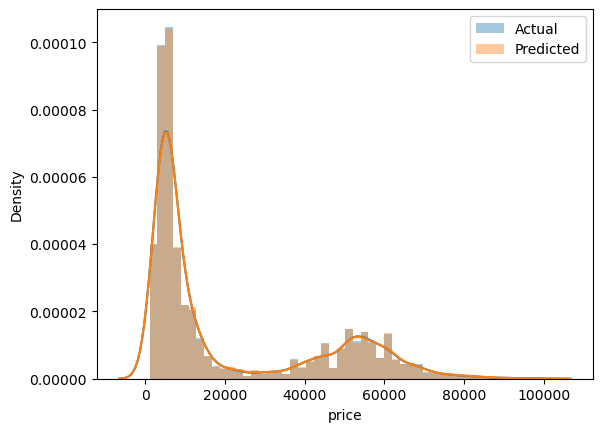

In [152]:
sns.distplot(dt_y_test,label="Actual")
sns.distplot(dt_y_pred,label="Predicted")
plt.legend()

In [153]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_X_train,rf_X_test,rf_y_train,rf_y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf.fit(rf_X_train,rf_y_train)
rf_y_pred=rf.predict(rf_X_test)


rf_r_score= r2_score(rf_y_test,rf_y_pred)
print(f'r2_Score :                       {rf_r_score}')


rf_mean_abs_error=metrics.mean_absolute_error(rf_y_test,rf_y_pred)
print(f'mean abs error :                 {rf_mean_abs_error}')

rf_mean_absolute_percentage_error= mean_absolute_percentage_error(rf_y_test,rf_y_pred)
print(f'mean_absolute_percentage_error : {rf_mean_absolute_percentage_error}')


rf_mean_sq_error=metrics.mean_squared_error(rf_y_test,rf_y_pred)
print(f'mean_sq_error :                   {rf_mean_sq_error}')

rf_root_mean_sq_error = np.sqrt(metrics.mean_squared_error(rf_y_test,rf_y_pred))
print(f'RMSE :                             {rf_root_mean_sq_error}')

r2_Score :                       0.9852248352731787
mean abs error :                 1086.6088170104176
mean_absolute_percentage_error : 0.07054599437697155
mean_sq_error :                   7608928.082586465
RMSE :                             2758.428553105276


C:\Users\UDAY\AppData\Local\Temp\ipykernel_10612\4105989857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_y_test,label="Actual")
C:\Users\UDAY\AppData\Local\Temp\ipykernel_10612\4105989857.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_y_pred,label="Predicted")


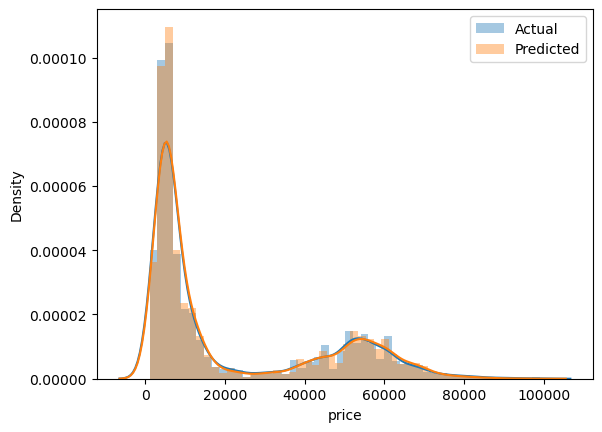

In [155]:
sns.distplot(rf_y_test,label="Actual")
sns.distplot(rf_y_pred,label="Predicted")
plt.legend()